# demo_pcb - Decompose a printed circuit board in its main parts.

The input image is a binary image of a printed circuit board. The decomposition is created mainly using openings by structural elements that depends on the geometry of the circuit board.

In [1]:
import numpy as np
from PIL import Image 

## Reading
The binary image of a printed circuit board is read.

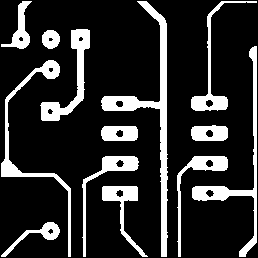

In [2]:
a_pil = Image.open('data/pcb1bin.tif')
a_pil

## Detecting holes
A new image is created by filling the holes. The input image is subtracted from this new image with holes. The resulting residues are the holes.


In [3]:
from ia870 import iaclohole, iasubm, iagshow

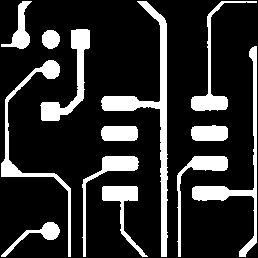

In [4]:
a = np.array(a_pil)
b = iaclohole(a)
Image.fromarray(b.astype(np.uint8)*255)

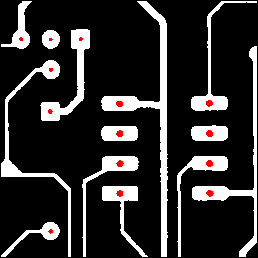

In [5]:
holes = iasubm(b,a)
Image.fromarray(iagshow(a, holes).transpose(1,2,0))

## Detecting square islands
The square islands are detected using an opening by a square of size 17x17.

In [6]:
from ia870 import iaopen, iasebox, iacdil

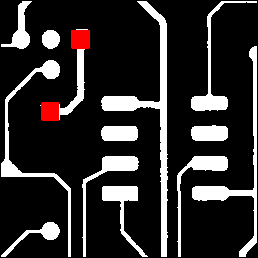

In [7]:
c = iaopen(b,iasebox(8))
Image.fromarray(iagshow(b, c).transpose(1,2,0))

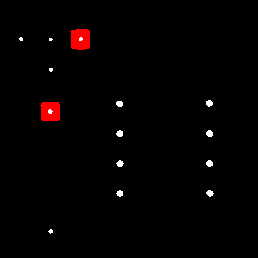

In [8]:
square = iacdil(c, a)
Image.fromarray(iagshow(holes, square).transpose(1,2,0))

## Detecting circle islands
The circle islands are detected using an opening by an Euclidean disk on a residues image.

In [9]:
from ia870 import iasedisk

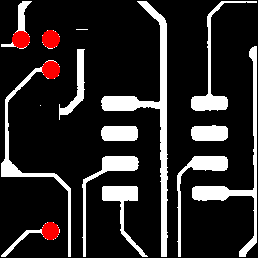

In [10]:
f = iasubm(b, c)
g = iaopen(f, iasedisk(8))
Image.fromarray(iagshow(f, g).transpose(1,2,0))

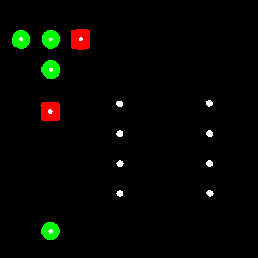

In [11]:
circle = iacdil(g,a)
Image.fromarray(iagshow(holes, square, circle).transpose(1,2,0))

## Detecting rectangular islands
The rectangular islands are detected using an opening by a rectangle of size 25 x 8 on a residues image. The rectangle structuring element is built from the composition of vertical and horizontal lines.

In [12]:
from ia870 import iasedil
from ia870 import iaseline

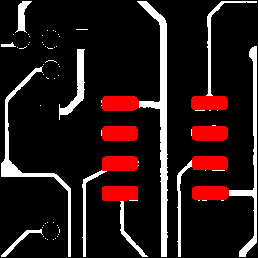

In [13]:
i = iasubm(f, g)
m = iaopen(i,iasedil( iaseline(8,90), iaseline(25)))
Image.fromarray(iagshow(i,m).transpose(1,2,0))

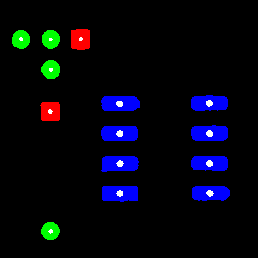

In [15]:
rect = iacdil(m,a)
Image.fromarray(iagshow(holes, square, circle, rect).transpose(1,2,0))

## Detecting thick connections
The thick connections are detected using an opening by a square on a residues image.

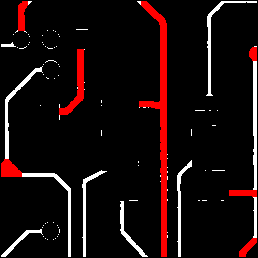

In [16]:
o = iasubm(i,m)
p = iaopen(o, iasebox(2))
Image.fromarray(iagshow(o, p).transpose(1,2,0))

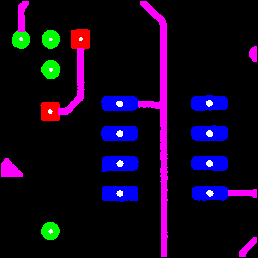

In [17]:
thin = iacdil(p,a)
Image.fromarray(iagshow(holes, square, circle, rect, thin).transpose(1,2,0))

## Detecting thin connections
The thin connections are detected using an opening by a square on a residues image.

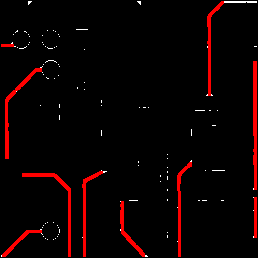

In [18]:
r = iasubm(o,p)
s = iaopen(r, iasebox())
Image.fromarray(iagshow(r, s).transpose(1,2,0))

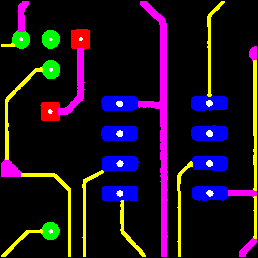

In [19]:
thick = iacdil(s,a)
Image.fromarray(iagshow(holes, square, circle, rect, thin, thick).transpose(1,2,0))

## Displaying all together
The main components of the circuit are overlayed and presented in a single image.

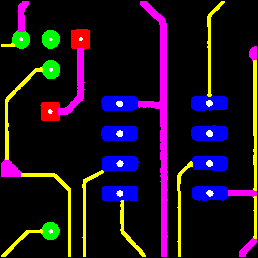

In [20]:
Image.fromarray(iagshow(holes, square, circle, rect, thin, thick).transpose(1,2,0))